<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-Equipo91/blob/main/Actividad_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

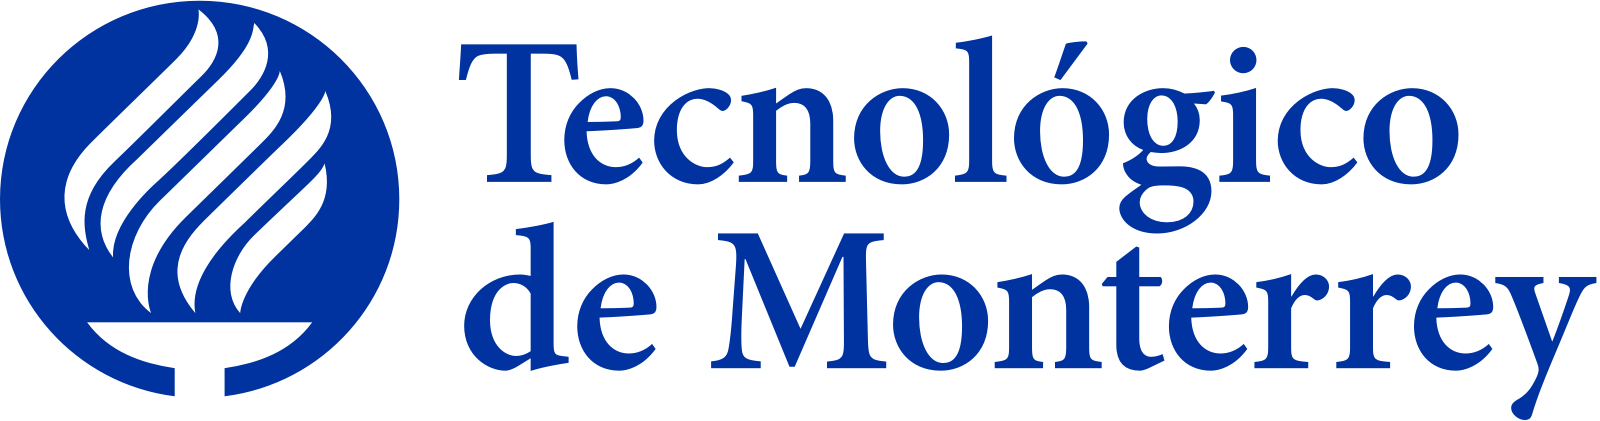

Integrantes: Jose David Hernandez Navarro (A01676755) y Andrea Vazquez Tadeo (A01730613)

Materia: Ciencia de Datos

Maestro: Jobish Vallikavungal Devassi

Fecha: 11 de octubre de 2022

#Parte 1

##Paso 1

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
creditos = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

Leemos la base de datos y almacenamos un back up 

In [ ]:
creditos_df= pd.read_csv(creditos)
dataframe = creditos_df.copy() #Copiamos la data frame original para tener un respaldo

Eliminamos valores vacios para evitar cualquier tipo de error al realizar la PCA

In [ ]:
dataframe.dropna(axis = 0, inplace=True)
dataframe.head() #Imprimimos las primeras 5 filas de la base de datos

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Reemplazaremos los encabezados de las columnas con nombres relacionados a las categorías 

In [ ]:
dataframe.rename(columns = {"X1": "Monto Total", "X2": "Genero", "X3": "Educacion", "X4" : "Estado Civil", "X5" : "Edad",
                     "X6": "Pago Sep", "X7": "Pago Ago", "X8":"Pago Jul", "X9": "Pago Jun", "X10":"Pago May", "X11": "Abril", "X12": "Factura Sep", "X13": "Factura Ago", "X14": "Factura Jul", "X15":"Factura Jun",
                     "X16": "Factura May", "X17":"Factura Abr", "X18":"Saldo Sep", "X19":"Saldo Ago", "X20":"Saldo Jul", "X21":"Saldo Jun", "X22":"Saldo May", "X23":"Saldo Abr", "Y":"Output"}, inplace = True)
dataframe

,ID,Monto Total,Genero,Educacion,Estado Civil,Edad,Pago Sep,Pago Ago,Pago Jul,Pago Jun,...,Factura Jun,Factura May,Factura Abr,Saldo Sep,Saldo Ago,Saldo Jul,Saldo Jun,Saldo May,Saldo Abr,Output
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


Debido a que la tecnica PCA solo trabaja con variables numericas es indispensable ubicarlas dentro de nuestro conjunto de datos mediante el metodo info

In [ ]:
 dataframe.info() #Gracias a este metodo podemos identificatr el numero de filas y columnas de nuestra base de datos, así como el tipo de dato que contine cada columna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            29958 non-null  int64  
 1   Monto Total   29958 non-null  int64  
 2   Genero        29958 non-null  float64
 3   Educacion     29958 non-null  float64
 4   Estado Civil  29958 non-null  float64
 5   Edad          29958 non-null  float64
 6   Pago Sep      29958 non-null  float64
 7   Pago Ago      29958 non-null  float64
 8   Pago Jul      29958 non-null  float64
 9   Pago Jun      29958 non-null  float64
 10  Pago May      29958 non-null  float64
 11  Abril         29958 non-null  float64
 12  Factura Sep   29958 non-null  float64
 13  Factura Ago   29958 non-null  float64
 14  Factura Jul   29958 non-null  float64
 15  Factura Jun   29958 non-null  float64
 16  Factura May   29958 non-null  float64
 17  Factura Abr   29958 non-null  float64
 18  Saldo Sep     29958 non-nu

Los resultados entregados por la función nos indica que de forma automatica pandas no detecto ningun tipo de variable categoríca en nuestro conjunto de datos (object), y aunque en la mayoría de los casos tendemos a confiar en los resultados que nos entregan las librerías, para este ejercicio tenemos que intervenir como cientificos de datos, para poder identificar de manera correcta las columnas que contienen datos categoricos y así poder eliminarlas de nuestra base de datos. 

In [ ]:
dataframe = dataframe.drop(["Genero", "Educacion", "Estado Civil", "Pago Sep", "Pago Ago", "Pago Jul", "Pago Jun", "Pago May", "Abril", "Output"], axis = 1)
dataframe

,ID,Monto Total,Edad,Factura Sep,Factura Ago,Factura Jul,Factura Jun,Factura May,Factura Abr,Saldo Sep,Saldo Ago,Saldo Jul,Saldo Jun,Saldo May,Saldo Abr
0,1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


Mostraremos todas las filas con variables numericas, pero que se encuentre a partir de "Monto Total" ya que el ID no es de relevancia para el PCA

In [ ]:
df_numeros = dataframe.iloc[:,1:] #Con este metodo le indicamos a python que nos muestre las filas a partir de la columna numero 2, pero como considera el 0 por eso colocamos el numero 1
df_numeros.head()

,Monto Total,Edad,Factura Sep,Factura Ago,Factura Jul,Factura Jun,Factura May,Factura Abr,Saldo Sep,Saldo Ago,Saldo Jul,Saldo Jun,Saldo May,Saldo Abr
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Buscamos la correlación de las variables 

In [ ]:
df_numeros.corr()

,Monto Total,Edad,Factura Sep,Factura Ago,Factura Jul,Factura Jun,Factura May,Factura Abr,Saldo Sep,Saldo Ago,Saldo Jul,Saldo Jun,Saldo May,Saldo Abr
Monto Total,1.000000,0.144515,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567
Edad,0.144515,1.000000,0.056357,0.054469,0.053911,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533
Factura Sep,0.285616,0.056357,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,0.140276,0.099301,0.156856,0.158260,0.167010,0.179287
Factura Ago,0.278435,0.054469,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,0.280323,0.100770,0.150631,0.147338,0.157848,0.174180
Factura Jul,0.283373,0.053911,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,0.244291,0.316904,0.129933,0.143343,0.179617,0.182257
Factura Jun,0.294090,0.051528,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,0.232916,0.207498,0.299953,0.130124,0.160283,0.177562
Factura May,0.295625,0.049515,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,0.216967,0.181177,0.252229,0.293084,0.141421,0.164102
Factura Abr,0.290517,0.047810,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,0.199966,0.172615,0.233710,0.250218,0.307691,0.115415
Saldo Sep,0.195026,0.025995,0.140276,0.280323,0.244291,0.232916,0.216967,0.199966,1.000000,0.285522,0.252063,0.199491,0.148102,0.185659
Saldo Ago,0.178320,0.021820,0.099301,0.100770,0.316904,0.207498,0.181177,0.172615,0.285522,1.000000,0.244709,0.180043,0.180800,0.157563


Para tener un mejor analisis visualizaremos los datos en un mapa de calor 

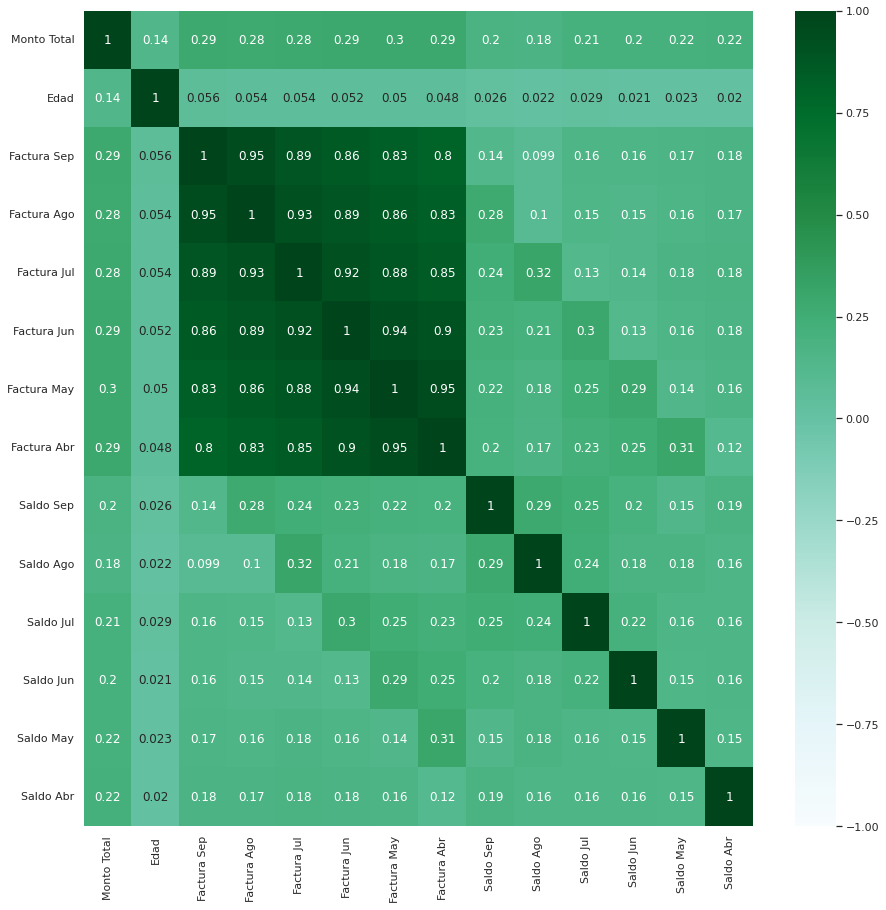

In [ ]:
import seaborn as sns

correlacion = df_numeros.corr()
sns.set(rc = {'figure.figsize':(15, 15)})
sns.heatmap(correlacion, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)

Podemos visualizar que las casillas blancas o verde oscuro son las que cuentan con una mayor correlación, cuando tenemos una casilla verde oscuro podemos notar que presenta una correlación positiva (crecen proporcionalmente). Por el lado contrario entre más blanca es la casilla podemos visualizar una correlación negativa (inversamente proporcionales, mientras una crece la otra disminuye). Cuando no hay correlación visualizamos una casilla verde claro.
Segun el mapa de calor podemos visualizar varias correlaciones entre variables lo que significa información repetida para el modelo. 

Visualizamos las varianzas de algunas variables 

In [ ]:
#Definimos las variables de interes a analizar, las cuales fueron las que presentaron correlacion positiva
columnas = ["Monto Total", "Edad", "Factura Sep",	"Factura Ago", "Factura Jul", "Factura Jun",	"Factura May", "Factura Abr", "Saldo Sep",	"Saldo Ago",	"Saldo Jul",	"Saldo Jun", "Saldo May", "Saldo Abr"]
#Creamos un objeto que contenga los valores de los estadisticos de interes
summary = {
  "Varianzas": df_numeros[columnas].var()[0:15], #Utilizamos solo los varoles, sin el nombre de las variables 
  "Valor Min": df_numeros[columnas].min()[0:15],
  "Valor Max": df_numeros[columnas].max()[0:15]
}
pd.DataFrame(summary, index = columnas).transpose() #Meteremos todo dentro de un dataframe para darle mejor visualización
#Con transpose convertimos las columnas en filas y viceversa

,Monto Total,Edad,Factura Sep,Factura Ago,Factura Jul,Factura Jun,Factura May,Factura Abr,Saldo Sep,Saldo Ago,Saldo Jul,Saldo Jun,Saldo May,Saldo Abr
Varianzas,1.683177e+10,84.903672,5.427998e+09,5.071040e+09,4.814312e+09,4.142813e+09,3.699829e+09,3.550120e+09,2.745259e+08,5.315784e+08,3.103706e+08,2.457434e+08,2.336481e+08,3.164479e+08
Valor Min,1.000000e+04,21.000000,-1.655800e+05,-6.977700e+04,-1.572640e+05,-1.700000e+05,-8.133400e+04,-3.396030e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Valor Max,1.000000e+06,79.000000,9.645110e+05,9.839310e+05,1.664089e+06,8.915860e+05,9.271710e+05,9.616640e+05,8.735520e+05,1.684259e+06,8.960400e+05,6.210000e+05,4.265290e+05,5.286660e+05


Pero para aplicar PCA no es suficiente con obtener las varianzas de cada columna, ya que como bien sabemos la varianza se ve fuertemente afectada por la magnitud de las variables (min y max), es decir, no necesariamente la de mayor varianza sera la más relevante para el modelo. 

In [ ]:
varianza_total = df_numeros.var().sum() #Buscamos la varianza total de todas las variables 

#Calculamos varianza para las variables de estudio  
var_monto = df_numeros.Monto Total.var()
var_factura_s = df_numeros.Factura Sep.var()
var_factura_a = df_numeros.Factura Ago.var()
var_factura_j= df_numeros.Factura Jul.var()
var_factura_ju= df_numeros.Factura Jun.var()
var_factura_m= df_numeros.Factura May.var()
var_factura_a= df_numeros.Factura Abr.var()
var_saldo_s= df_numeros.Saldo Sep.var() 
var_saldo_a= df_numeros.Saldo Ago.var() 
var_saldo_j= df_numeros.Saldo Jul.var() 
var_saldo_ju= df_numeros.Saldo Jun.var() 
var_saldo_m= df_numeros.Saldo May.var() 
var_saldo_a= df_numeros.Saldo Abr.var()  

#Calculamos el porcentaje de varianza de cada variable respecto al total
print('Varianza Total \t\t:',varianza_total.round(2) )
print('Varianza Monto \t:', ((var_monto/varianza_total)*100).round(2),'%' )
print('Varianza Factura Sep \t:', ((var_factura_s/varianza_total)*100).round(2),'%' )
print('Varianza Factura Ago \t:', ((var_factura_a/varianza_total)*100).round(2),'%' )
print('Varianza Factura Jul \t:', ((var_factura_j/varianza_total)*100).round(2),'%' )
print('Varianza Factura Jun \t:', ((var_factura_ju/varianza_total)*100).round(2),'%' )
print('Varianza Factura May \t:', ((var_factura_m/varianza_total)*100).round(2),'%' )
print('Varianza Factura Abr \t:', ((var_factura_a/varianza_total)*100).round(2),'%' )
print('Varianza Saldo Sep \t:', ((var_saldo_s/varianza_total)*100).round(2),'%' )
print('Varianza Saldo Ago \t:', ((var_saldo_a/varianza_total)*100).round(2),'%' )
print('Varianza Saldo Jul \t:', ((var_saldo_j/varianza_total)*100).round(2),'%' )
print('Varianza Saldo Jun \t:', ((var_saldo_ju/varianza_total)*100).round(2),'%' )
print('Varianza Saldo May \t:', ((var_saldo_m/varianza_total)*100).round(2),'%' )
print('Varianza Saldo Abr \t:', ((var_saldo_a/varianza_total)*100).round(2),'%' )


SyntaxError: ignored

##Paso 2

##Paso 3

#Parte 2

##1. ¿Cuál es el número de componentes mínimo y por qué?





##2. ¿Cuál es la variación de los datos que representan esos componentes?

##3. ¿Cuál es la pérdida de información después de realizar PCA?

##4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

##5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
